In [37]:
import torch
from torchvision import transforms
import torch.nn as nn
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torchvision.utils import save_image

In [38]:

IMAGE_SIZE= 128


In [39]:
original_dataset=ImageFolder(root='CNN/data/imagefile',transform=transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                                                              transforms.ToTensor()
]))
original_loader=DataLoader(original_dataset,batch_size=5,shuffle=True,num_workers=1)
original_image, labels=next(iter(original_loader))
print(labels)
print(original_image.size())
X=original_image
Y=labels

tensor([0, 0, 0, 0, 0])
torch.Size([5, 3, 128, 128])


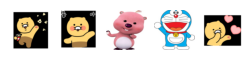

In [40]:
plt.figure(figsize=(3,3))
for i in range(len(original_image)):
  plt.subplot(1,5,i+1)
  plt.imshow(original_image[i].permute(1,2,0))
  plt.axis('off')
plt.show()

In [41]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1=nn.Conv2d(  #128*128
        in_channels=3,
        out_channels=8,
        kernel_size=3,
        padding=1
    )
    self.conv2=nn.Conv2d(
        in_channels=8,
        out_channels=16,
        kernel_size=3,
        padding=1
    )
    self.conv3=nn.Conv2d(
        in_channels=16,
        out_channels=32,
        kernel_size=3,
        padding=1
    )
    self.conv4=nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=3,
        padding=1
    )
    self.pool=nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc1=nn.Linear(8*8*64, 128)
    self.fc2=nn.Linear(128, 64)
    self.fc3=nn.Linear(64, 5)

  def forward(self, x): #[3, 128, 128]
    x=self.conv1(x)
    x=torch.relu(x)
    x=self.pool(x)  #[8, 64, 64]
    x=self.conv2(x)
    x=torch.relu(x)
    x=self.pool(x) #[16, 32,32]
    x=self.conv3(x)
    x=torch.relu(x)
    x=self.pool(x) #[32, 16,16]
    x=self.conv4(x)
    x=torch.relu(x)
    x=self.pool(x)  #[64, 8, 8]

    x=x.view(-1, 8*8*64)
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.fc3(x)
    x=torch.log_softmax(x, dim=1)
    return x

In [42]:
device= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# model = CNN().to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

In [43]:
path='model1/model.pt'
#torch.save(model.state_dict(),path)

In [44]:
model2=CNN().to(device)
model2.load_state_dict(torch.load(path))
model2.eval()

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [45]:
predict = model2(original_image.to(device)).argmax(dim=1)
print(predict)

tensor([2, 2, 2, 2, 0])


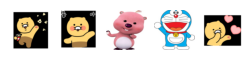

In [46]:
plt.figure(figsize=(3,3))
for i in range(len(original_image)):
  plt.subplot(1,5,i+1)
  plt.imshow(original_image[i].permute(1,2,0))
  plt.axis('off')
plt.show()